In [2]:
# This cell imports pandas into the workbook
# https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

import pandas as pd

# This command allows the truncation of comment text
DISPLAY_ALL_TEXT = False

#this sets the max length of a comment until it is truncated
pd.set_option("display.max_colwidth", 0 if DISPLAY_ALL_TEXT else 50)


#File Import Technique https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/12sV8ZU3Ly1R1QiZoF0q_KXb_UiLPSzFU/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv')  
  
df = pd.read_csv('xclara.csv')
print(df)

       Unnamed: 0  level_0  ...           Section         disease
0               0        0  ...  Contraindication   paraganglioma
1               1        1  ...  Contraindication        syndrome
2               2        2  ...  Contraindication       hay fever
3               3        3  ...  Contraindication   paraganglioma
4               4        4  ...  Contraindication        syndrome
...           ...      ...  ...               ...             ...
54035       54035    54037  ...        Indication  hypothyroidism
54036       54036    54038  ...        Indication  hypothyroidism
54037       54037    54039  ...        Indication  hypothyroidism
54038       54038    54040  ...        Indication  hypothyroidism
54039       54039    54041  ...        Indication  hypothyroidism

[54040 rows x 16 columns]


In [5]:
link = 'https://drive.google.com/file/d/1htWTCmcCBma73fTVWC-EavJSD1YgtsAx/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv')  
  
df_test = pd.read_csv('xclara.csv')
print(df_test)

     Unnamed: 0    DB_ID  ...            Section                  label
0             0  DB00657  ...        Indications  Indication: Treatment
1             1  DB00401  ...        Indications  Indication: Treatment
2             2  DB00612  ...        Indications  Indication: Treatment
3             3  DB00960  ...        Indications  Indication: Treatment
4             4  DB00876  ...        Indications  Indication: Treatment
..          ...      ...  ...                ...                    ...
276         276  DB00521  ...  Contraindications       Contraindication
277         277  DB01057  ...  Contraindications       Contraindication
278         278  DB01142  ...  Contraindications       Contraindication
279         279  DB00591  ...  Contraindications       Contraindication
280         280  DB10345  ...  Contraindications       Contraindication

[281 rows x 10 columns]


In [6]:
# spaCy is an open source natural language processing library
# Download the spaCy english model
! python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [7]:
# MM: pip is the standard package manager for Python. It allows you to install and manage
# additional packages that are not part of the Python standard library.
# MM: from https://realpython.com/what-is-pip/

! pip install snorkel

     |████████████████████████████████| 153kB 12.4MB/s 
     |████████████████████████████████| 3.8MB 22.6MB/s 
     |████████████████████████████████| 1.8MB 36.7MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556427 sha256=4c9e6a3ab59df8d504e48fefc940bd3a1375030121285bce17dd49c8954196f6
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [8]:
# defining labels

#ABSTAIN = -1
#TREATMENT = 0
#SYMPTOMATIC = 1
#CONTRAIND = 2
#EFFECT = 3


ABSTAIN = -1
CATEGORY= {'Effect': 0,
'Contraindication': 1,
'Symptomatic Relief': 2,
'Treatment':3}

#**clustering training data**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
#find unique contexts (eliminate duplicates)

context_unique = df["Context"].unique()

print( len(context_unique))

9920


In [11]:
#automatic tf idf implementation, vectorizer

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(context_unique)
text = tfidf.transform(context_unique)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


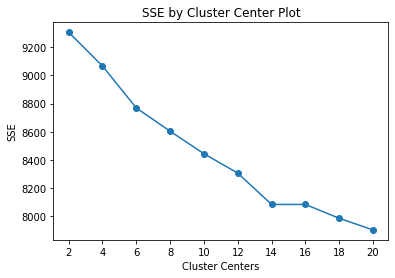

In [12]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [13]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

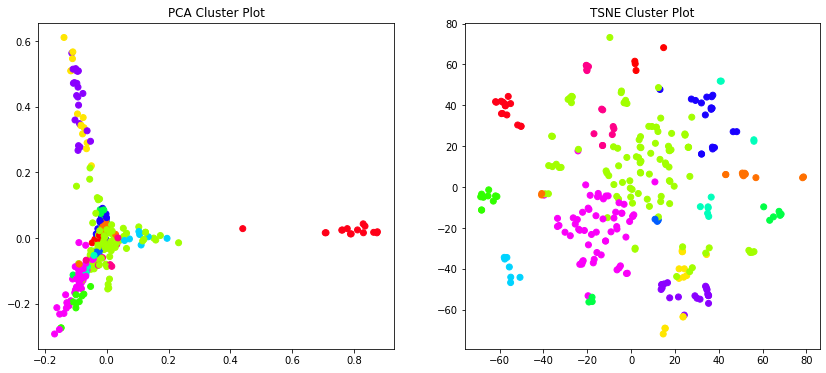

In [14]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)






#**Clustering the test dataset**




In [15]:
tfidf_test = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf_test.fit(df_test.Context)
text_test = tfidf.transform(df_test.Context)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


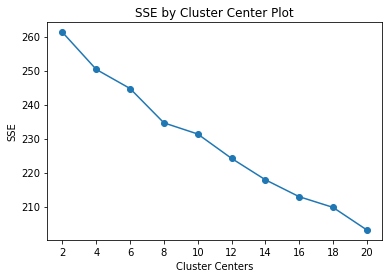

In [16]:

    
find_optimal_clusters(text_test, 20)

In [17]:
test_clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text_test)

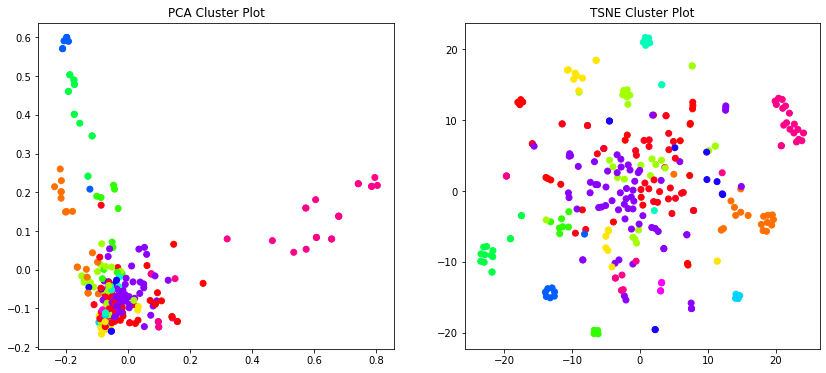

In [18]:
def plot_tsne_pca_test(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=281, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=281, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca_test(text_test, test_clusters)

In [19]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 30)


Cluster 0
methotrexate,concurrently,antituberculous,exacerbation,block,adrenocortical,courses,selected,severe,postoperative,repeat,associated,lupus,erythematosus,idiopathic,prevention,tide,rheumatoid,anemia,ondansetron,emetogenic,cancer,allergic,dermatitis,acute,arthritis,chemotherapy,diseases,nausea,vomiting

Cluster 1
delayed,adults,treatment,mood,headaches,complex,migraine,topiramate,clonic,tonic,therapy,patients,episodes,indicated,gabapentin,lamotrigine,age,generalized,older,onset,monotherapy,epilepsy,tablets,release,adjunctive,sodium,years,partial,divalproex,seizures

Cluster 2
injection,species,pneumoniae,testing,drug,bacteroides,fragilis,gram,culture,clindamycin,microorganisms,usp,following,indicated,resistant,respiratory,trachomatis,treatment,chlamydia,therapy,fever,antibacterial,penicillin,susceptible,tract,bacteria,susceptibility,doxycycline,infections,caused

Cluster 3
inhibitor,management,years,14,age,potassium,opioid,used,hypertension,drug,therapy,known,history,renal,acut

In [20]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text_test, test_clusters, tfidf.get_feature_names(), 20)



Cluster 0
rheumatoid,hydrochloride,used,moderately,parkinsonism,gastrointestinal,treatment,patients,irritable,therapy,colon,acute,indicated,bladder,active,remission,bowel,arthritis,ulcerative,colitis

Cluster 1
reduction,hydrochloride,shown,pilocarpine,sulfonamide,airway,effective,chronic,patients,used,hypertension,lowering,closure,solution,ophthalmic,open,pressure,ocular,angle,glaucoma

Cluster 2
second,warnings,contraindicated,sick,heart,bronchospastic,obstructive,pulmonary,chronic,failure,pacemaker,shock,block,shampoo,degree,sinus,cardiogenic,bradycardia,asthma,bronchial

Cluster 3
transient,tablets,mi,angioedema,myocardial,infarction,hypertension,heart,bromocriptine,uncontrolled,patients,hypersensitivity,stroke,coronary,artery,warnings,precautions,disease,ischemic,history

Cluster 4
mother,causes,fumarate,nisoldipine,especially,beats,usp,toxemia,used,management,thiazide,combination,agents,tablets,indicated,diuretics,pregnancy,antihypertensive,edema,hypertension

Cluster 5
consider

In [21]:


def get_top_keyword_dict(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    clusters_dict = {}

    for i,r in df.iterrows():
      clusters_dict['cluster_%s' % i] = []
      clusters_dict['cluster_%s' % i].append([labels[t] for t in np.argsort(r)[-n_terms:]])

    return clusters_dict

clusters_train_dict = get_top_keyword_dict(text, clusters, tfidf.get_feature_names(), 30)


In [22]:


clusters_test_dict = get_top_keyword_dict(text_test, test_clusters, tfidf.get_feature_names(), 20)
print(clusters_test_dict['cluster_3'])

[['transient', 'tablets', 'mi', 'angioedema', 'myocardial', 'infarction', 'hypertension', 'heart', 'bromocriptine', 'uncontrolled', 'patients', 'hypersensitivity', 'stroke', 'coronary', 'artery', 'warnings', 'precautions', 'disease', 'ischemic', 'history']]


In [23]:
#create subsets of the test set for each label

df_test_indic = df_test[df_test['label']=='Indication: Treatment']
df_test_sympt = df_test[df_test['label']=='Indication: Symptomatic Relief']
df_test_contraind = df_test[df_test['label']=='Contraindication']
df_test_effect = df_test[df_test['label']=='Effect']

In [24]:
for key in clusters_train_dict:
  print(clusters_train_dict[key])

[['methotrexate', 'concurrently', 'antituberculous', 'exacerbation', 'block', 'adrenocortical', 'courses', 'selected', 'severe', 'postoperative', 'repeat', 'associated', 'lupus', 'erythematosus', 'idiopathic', 'prevention', 'tide', 'rheumatoid', 'anemia', 'ondansetron', 'emetogenic', 'cancer', 'allergic', 'dermatitis', 'acute', 'arthritis', 'chemotherapy', 'diseases', 'nausea', 'vomiting']]
[['delayed', 'adults', 'treatment', 'mood', 'headaches', 'complex', 'migraine', 'topiramate', 'clonic', 'tonic', 'therapy', 'patients', 'episodes', 'indicated', 'gabapentin', 'lamotrigine', 'age', 'generalized', 'older', 'onset', 'monotherapy', 'epilepsy', 'tablets', 'release', 'adjunctive', 'sodium', 'years', 'partial', 'divalproex', 'seizures']]
[['injection', 'species', 'pneumoniae', 'testing', 'drug', 'bacteroides', 'fragilis', 'gram', 'culture', 'clindamycin', 'microorganisms', 'usp', 'following', 'indicated', 'resistant', 'respiratory', 'trachomatis', 'treatment', 'chlamydia', 'therapy', 'feve

In [25]:
#make a function that compares keyword occurences


def compare_keywords(data, keywords):

  data_text = data['Context'].tolist()

  occurrence = 0

  for a in keywords[0]:
    for i in data_text:
      occurrence += i.count(a)

  return occurrence


for key in clusters_train_dict:
  print(key,'\n',compare_keywords(df_test_indic, clusters_train_dict[key]))

for key in clusters_train_dict:
  print(key,'\n',compare_keywords(df_test_sympt, clusters_train_dict[key]))

for key in clusters_train_dict:
  print(key,'\n',compare_keywords(df_test_contraind, clusters_train_dict[key]))

for key in clusters_train_dict:
  print(key,'\n',compare_keywords(df_test_effect, clusters_train_dict[key]))



cluster_0 
 410
cluster_1 
 1134
cluster_2 
 679
cluster_3 
 1901
cluster_4 
 404
cluster_5 
 983
cluster_6 
 685
cluster_7 
 997
cluster_8 
 569
cluster_9 
 954
cluster_10 
 523
cluster_11 
 649
cluster_12 
 457
cluster_13 
 1465
cluster_0 
 234
cluster_1 
 497
cluster_2 
 310
cluster_3 
 751
cluster_4 
 155
cluster_5 
 390
cluster_6 
 355
cluster_7 
 326
cluster_8 
 254
cluster_9 
 478
cluster_10 
 233
cluster_11 
 274
cluster_12 
 194
cluster_13 
 252
cluster_0 
 159
cluster_1 
 606
cluster_2 
 405
cluster_3 
 1779
cluster_4 
 785
cluster_5 
 586
cluster_6 
 760
cluster_7 
 734
cluster_8 
 789
cluster_9 
 403
cluster_10 
 260
cluster_11 
 1276
cluster_12 
 952
cluster_13 
 487
cluster_0 
 25
cluster_1 
 227
cluster_2 
 150
cluster_3 
 517
cluster_4 
 173
cluster_5 
 196
cluster_6 
 206
cluster_7 
 259
cluster_8 
 244
cluster_9 
 171
cluster_10 
 100
cluster_11 
 341
cluster_12 
 206
cluster_13 
 207


Notes on most common cluster occurrences in each label

indic: 1, 2, 13    


symptom:1, 3, 5(?)    


contra:3, 11, 12(?)    


effect:1(?), 3, 11(?)              

In [26]:
print(clusters_train_dict['cluster_11'])

[['shown', 'usp', 'cream', 'solution', 'adverse', 'injection', 'persons', 'preparation', 'levetiracetam', 'demonstrated', 'angioedema', 'warnings', 'formulation', 'precautions', 'reaction', 'tablets', 'drug', 'hydrochloride', 'component', 'anaphylaxis', 'excipients', 'product', 'reactions', 'history', 'ingredients', 'components', 'patients', 'known', 'contraindicated', 'hypersensitivity']]


In [27]:
print(clusters_train_dict['cluster_3'])

[['inhibitor', 'management', 'years', '14', 'age', 'potassium', 'opioid', 'used', 'hypertension', 'drug', 'therapy', 'known', 'history', 'renal', 'acute', 'usp', 'clinical', 'hypersensitivity', 'severe', 'injection', 'disease', 'hydrochloride', 'precautions', 'contraindicated', 'warnings', 'use', 'tablets', 'treatment', 'indicated', 'patients']]


In [28]:
# function to calculate the minimum distance between w1 and w2 in s
# from https://www.geeksforgeeks.org/minimum-distance-between-words-of-a-string/
  
def distance(s, w1, w2):
     
    if w1 == w2 :
       return 0
 
    # get individual words in a list
    words = s.split(" ")
 
    # assume total length of the string as
    # minimum distance
    min_dist = len(words)+1
 
    # traverse through the entire string
    for index in range(len(words)):
 
        if words[index] == w1:
            for search in range(len(words)):
 
                if words[search] == w2:
 
                    # the distance between the words is
                    # the index of the first word - the
                    # current word index
                    curr = abs(index - search) - 1;
 
                    # comparing current distance with
                    # the previously assumed distance
                    if curr < min_dist:
                       min_dist = curr
 
    # w1 and w2 are same and adjacent
    return min_dist
     

Note: the context strings are cleaned of all punctuation and do not contain any commas or full stops

apparently, this doesnt work with the distance function for some reason, so for now I will try with regex instead.

In [29]:
# a labeling function that checks for word proximity

# MM: LS, can you provide a link or indication of where you found this code please?
# LS: I wrote this myself

from snorkel.labeling import labeling_function

@labeling_function()
def contraindication_proximity(x):
    return 1 if distance(x.Context, "contraindicated", x.disease) < 10 else ABSTAIN

@labeling_function()
def associated_proximity(x):
    return 1 if distance(x.Context, "associated", x.disease) < 10 else ABSTAIN

@labeling_function()
def history_proximity(x):
    return 1 if distance(x.Context, "history", x.disease) < 10 else ABSTAIN

@labeling_function()
def known_proximity(x):
    return 1 if distance(x.Context, "known", x.disease) < 10 else ABSTAIN


@labeling_function()
def shown_proximity(x):
    return 1 if distance(x.Context, "shown", x.disease) < 10 else ABSTAIN

@labeling_function()
def adverse_proximity(x):
    return 1 if distance(x.Context, "adverse", x.disease) < 10 else ABSTAIN

@labeling_function()
def demonstrated_proximity(x):
    return 1 if distance(x.Context, "demonstrated", x.disease) < 10 else ABSTAIN


@labeling_function()
def warnings_proximity(x):
    return 1 if distance(x.Context, "warnings", x.disease) < 10 else ABSTAIN


@labeling_function()
def ingredients_proximity(x):
    return 1 if distance(x.Context, "ingredients", x.disease) < 10 else ABSTAIN


@labeling_function()
def reaction_proximity(x):
    return 1 if distance(x.Context, "reaction", x.disease) < 10 else ABSTAIN


@labeling_function()
def hypersensitivity_proximity(x):
    return 1 if distance(x.Context, "hypersensitivity", x.disease) < 10 else ABSTAIN



In [30]:
#does the same as the function above, only for indication istead


@labeling_function()
def indication_proximity(x):
    return 3 if distance(x.Context, "indicated", x.disease) < 10 else ABSTAIN

@labeling_function()
def treatment_proximity(x):
    return 3 if distance(x.Context, "treatment", x.disease) < 10 else ABSTAIN

@labeling_function()
def higher_proximity(x):
    return 3 if distance(x.Context, "higher", x.disease) < 10 else ABSTAIN

@labeling_function()
def benefits_proximity(x):
    return 3 if distance(x.Context, "benefit", x.disease) <10 else ABSTAIN

@labeling_function()
def reductions_proximity(x):
    return 3 if distance(x.Context, "reductions", x.disease) < 10 else ABSTAIN

@labeling_function()
def reduction_proximity(x):
    return 3 if distance(x.Context, "reduction", x.disease) < 10 else ABSTAIN

@labeling_function()
def acute_proximity(x):
    return 3 if distance(x.Context, "acute", x.disease) < 10 else ABSTAIN



In [31]:
#for symptomatic relief

@labeling_function()
def term_proximity(x):
    return 2 if distance(x.Context, "term", x.disease) < 10 else ABSTAIN

@labeling_function()
def maintenance_proximity(x):
    return 2 if distance(x.Context, "maintenance", x.disease) < 10 else ABSTAIN


In [32]:

@labeling_function()
def disease_proximity(x):
    return 0 if distance(x.Context, "disease", x.disease) < 10 else ABSTAIN

@labeling_function()
def history_proximity(x):
    return 0 if distance(x.Context, "history", x.disease) < 10 else ABSTAIN




In [33]:
def replace_section(s):
    if s =="Indication": return "Indications"
    if s =="Contraindication":    return "Contraindications"
    return s
    
df.Section= df.Section.apply(replace_section)

In [34]:
@labeling_function()
def proximity_complete(x):

  section = x.Section


#indications
  if section == "Indications" and distance(x.Context, "indicated", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "treatment", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "higher", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "benefit", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "reductions", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "reduction", x.disease) < 10: return 3
  if section == "Indications" and distance(x.Context, "acute", x.disease) < 10: return 3

#symptomatic relief
  if section == "Indications" and distance(x.Context, "maintenance", x.disease) < 10: return 2
  if section == "Indications" and distance(x.Context, "term", x.disease) < 10: return 2
  if section == "Indications" and distance(x.Context, "relief", x.disease) < 10: return 2
  if section == "Indications" and distance(x.Context, "relief of", x.disease) < 10: return 2

#contraindication
  if section == "Contraindications" and distance(x.Context, "contraindicated", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "associated", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "history", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "known", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "shown", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "adverse", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "demonstrated", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "warnings", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "ingredients", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "reaction", x.disease) < 10: return 1
  if section == "Contraindications" and distance(x.Context, "hypersensitivity", x.disease) < 10: return 1

#effect
  if section == "Contraindications" and distance(x.Context, "disease", x.disease) < 10: return 0
  if section == "Contraindications" and distance(x.Context, "term", x.disease) < 10: return 0
  if section == "Contraindications" and distance(x.Context, "maintenance", x.disease) < 10: return 0
  if section == "Contraindications" and distance(x.Context, "history", x.disease) < 10: return 0

  return ABSTAIN

In [35]:
import re
def contains(text, phrase):
    return phrase in text
    
def phrase_match(row):
    section = row.Section
    text = row.Context
    if section == "Contraindications" and contains(text, "hypersensitivity to" ): return "1"
    if section == "Contraindications" and contains(text, "hypersensitivity" ): return "1"
    if section == "Contraindications" and contains(text, "are not candidates" ): return "1"
    if section == "Contraindications" and contains(text, "contraindications" ): return "1"
    if section == "Contraindications" and contains(text, "contraindicatedin" ): return "1"
    if section == "Contraindications" and contains(text, "not administered to" ): return "1"
    if section == "Contraindications" and contains(text, "contraindicated in" ): return "1"
    if section == "Contraindications" and contains(text, "should not be used" ): return "1"
    if section == "Contraindications" and contains(text, "is contraindication for" ): return "1"
    if section == "Contraindications" and contains(text, "is contraindication when" ): return "1"
    if section == "Contraindications" and contains(text, "is contraindicated when" ): return "1"
    if section == "Contraindications" and contains(text, "must not be used for" ): return "1"
    if section == "Contraindications" and contains(text, "do not administer" ): return "1"
    if section == "Contraindications" and contains(text, "should not initiate" ): return "1"
    if section == "Contraindications" and contains(text, "not be administered to" ): return "1"
    if section == "Contraindications" and contains(text, "do not initiate patients" ): return "1"
    if section == "Contraindications" and contains(text, "contraindication for" ): return "1"
    if section == "Contraindications" and contains(text, "should not be given" ): return "1"
    if section == "Contraindications" and contains(text, "do not use" ): return "1"
    if section == "Contraindications" and contains(text, "should not be treated with" ): return "1"
    if section == "Contraindications" and contains(text, "should not be employed" ): return "1"

    ## effect
    if section == "Contraindications" and contains(text, "adverse reactions" ): return "0"
    if section == "Contraindications" and contains(text, "reactions" ): return "0"
    if section == "Contraindications" and contains(text, "associated with the risk of" ): return "0"
    if section == "Contraindications" and contains(text, "to the risk of" ): return "0"
    if section == "Contraindications" and contains(text, "a high risk for" ): return "0"
    if section == "Contraindications" and contains(text, "a high risk of" ): return "0"
    if section == "Contraindications" and contains(text, "high incidence of" ): return "0"
    if section == "Contraindications" and contains(text, "higher incidence of" ): return "0"
    if section == "Contraindications" and contains(text, "cause" ): return "0"
    if section == "Contraindications" and contains(text, "causes" ): return "0"
    if section == "Contraindications" and contains(text, "symptoms occur" ): return "0"
    if section == "Contraindications" and contains(text, "teratogenic" ): return "0"
    if section == "Contraindications" and contains(text, "site reaction" ): return "0"
    if section == "Contraindications" and contains(text, "the risk of development" ): return "0"
    if section == "Contraindications" and contains(text, "is associated with the risk of" ): return "0"
    if section == "Contraindications" and contains(text, "symptoms of the poisoning" ): return "0"
    if section == "Contraindications" and contains(text, "symptoms of poisoning" ): return "0"

    ##relief
    if section == "Indications" and contains(text, "reduce symptoms" ): return "2"
    if section == "Indications" and contains(text, "relief of the signs" ): return "2"
    if section == "Indications" and contains(text, "relief of signs" ): return "2"
    if section == "Indications" and contains(text, "relief of symptoms" ): return "2"
    if section == "Indications" and contains(text, "relief of the symptoms" ): return "2"
    if section == "Indications" and contains(text, "help" ): return "2"
    if section == "Indications" and contains(text, "helps" ): return "2"
    if section == "Indications" and contains(text, "relief of signs and symptoms of" ): return "2"
    if section == "Indications" and contains(text, "reduction of symptoms of" ): return "2"
    if section == "Indications" and contains(text, "treatment of the symptoms of" ): return "2"
    if section == "Indications" and contains(text, "for the relief" ): return "2"
    if section == "Indications" and contains(text, "management of the signs and symptoms of" ): return "2"
    if section == "Indications" and contains(text, "provides an observable symptomatic benefit" ): return "2"
    if section == "Indications" and contains(text, "until the condition is improved or corrected" ): return "2"
    if section == "Indications" and contains(text, "until the condition is corrected" ): return "2"
    if section == "Indications" and contains(text, "for short term administration" ): return "2"
    if section == "Indications" and contains(text, "for short-term administration" ): return "2"
    if section == "Indications" and contains(text, "prophylactically" ): return "2"
    if section == "Indications" and contains(text, "controlling the manifestations" ): return "2"
    if section == "Indications" and contains(text, "controlling the manifestation" ): return "2"
    if section == "Indications" and contains(text, "controlling manifestations" ): return "2"
    if section == "Indications" and contains(text, "controlling manifestation" ): return "2"
    if section == "Indications" and contains(text, "control the manifestations" ): return "2"
    if section == "Indications" and contains(text, "control the manifestation" ): return "2"
    if section == "Indications" and contains(text, "control manifestations" ): return "2"
    if section == "Indications" and contains(text, "control manifestation" ): return "2"
    if section == "Indications" and contains(text, "symptomatic treatment" ): return "2"
    if section == "Indications" and contains(text, "symptomatic relief" ): return "2"
    if section == "Indications" and contains(text, "symptomatic benefit" ): return "2"
    if section == "Indications" and contains(text, "not indicated for definitive treatment" ): return "2"
    if section == "Indications" and contains(text, "treatment of the signs and symptoms" ): return "2"

    ##treatment
    if section == "Indications" and contains(text, "indicated for the treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated in the management of" ): return "3"
    if section == "Indications" and contains(text, "indicated for the management of" ): return "3"
    if section == "Indications" and contains(text, "for the management of" ): return "3"
    if section == "Indications" and contains(text, "management of" ): return "3"
    if section == "Indications" and contains(text, "indicated for the maintenance of remission" ): return "3"
    if section == "Indications" and contains(text, "or the treatment of" ): return "3"
    if section == "Indications" and contains(text, "in the treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated as" ): return "3"
    if section == "Indications" and contains(text, "indicated in" ): return "3"
    if section == "Indications" and contains(text, "be effective" ): return "3"
    if section == "Indications" and contains(text, "effective" ): return "3"
    if section == "Indications" and contains(text, "active treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated for" ): return "3"
    if section == "Indications" and contains(text, "treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated as an adjunct" ): return "3"
    if section == "Indications" and contains(text, "indicated for use in the treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated for the intermittent treatment" ): return "3"
    if section == "Indications" and contains(text, "indicated to reduce the rate of" ): return "3"
    if section == "Indications" and contains(text, "indicated for the rapid control" ): return "3"
    if section == "Indications" and contains(text, "indicated for the control" ): return "3"
    if section == "Indications" and contains(text, "reduce the risk of" ): return "3"
    if section == "Indications" and contains(text, "indicated as adjunctive treatment" ): return "3"
    if section == "Indications" and contains(text, "for the treatment of" ): return "3"
    if section == "Indications" and contains(text, "indicated as an adjunct" ): return "3"

    ##else
    if section == "Indications" : return "3"
    if section == "Contraindications": return "1"
    if section == "Indication": return "3"
    if section == "Contraindication" : return "1"
    return None
 

In [36]:
phrases = {'a high risk for ':CATEGORY['Effect'],
           ' indicated for':CATEGORY['Treatment'], 
           'contraindicated in ':CATEGORY['Contraindication'],
           'relief of the symptoms ':CATEGORY['Symptomatic Relief'],
          }  

In [37]:
#this code is not working... missing package??


#crowd_df =df[df.crowd_label.notna()]
#crowd_df.crowd_label =crowd_df.crowd_label.astype(int)

In [38]:
X_train = crowd_df['Context']
y_train = crowd_df['crowd_label']

NameError: ignored

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier()),
])
pipeline.fit(X_train, y_train)

In [ ]:
text = crowd_df.iloc[0].Context
result = pipeline.predict([text])

In [ ]:
result[0]

In [39]:
@labeling_function()
def phrase_occur(x):
    label = phrase_match(x)
    if label != None:
        return int(label)
    return ABSTAIN

@labeling_function()
def label_fun(x):
    text = x.Context
    for p in phrases:
        if p in text:
            return phrases[p]
    return ABSTAIN

@labeling_function()
def pre_ml_fun(x):
    text = x.Context
    result = pipeline.predict([text])
    return result[0]

In [41]:
# from the snorkel spam tutorial
# creates the label matrix

from snorkel.labeling import PandasLFApplier

lfs = [proximity_complete, phrase_occur, label_fun]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 54040/54040 [00:37<00:00, 1430.47it/s]


In [42]:
from snorkel.labeling import LFAnalysis

LFAnalysis(L_train, lfs).lf_summary()


,j,Polarity,Coverage,Overlaps,Conflicts
proximity_complete,0,"[0, 1, 2, 3]",0.404127,0.404127,0.043172
phrase_occur,1,"[0, 1, 2, 3]",1.000000,0.791895,0.087879
label_fun,2,"[1, 3]",0.693357,0.693357,0.065674


In [43]:
LFAnalysis(L_train, lfs).label_coverage()

1.0

In [48]:
df_test.head()

,Unnamed: 0,DB_ID,DO_ID,disease,Label_ID,Set_ID,Drug_name,Context,Section,label
0,0,DB00657,DOID_10824,malignant hypertension,976f404f-4857-4bad-9a3c-9bf3d5ca9f5b.xml,c6822ce4-e741-4366-b72a-5f5146354f97,Mecamylamine,for the management of moderately severe to sev...,Indications,Indication: Treatment
1,1,DB00401,DOID_10763,hypertension,ce733b39-7857-4538-92d6-1c68a4e4eb75.xml,a6a8a8ba-3966-4f37-a58b-44d3b05bdc4e,Nisoldipine,nisoldipine extended release tablets are indic...,Indications,Indication: Treatment
2,2,DB00612,DOID_10763,hypertension,c818c38d-ee37-4ceb-b078-611483b4f743.xml,c818c38d-ee37-4ceb-b078-611483b4f743,Bisoprolol,bisoprolol fumarate tablets usp are indicated ...,Indications,Indication: Treatment
3,3,DB00960,DOID_10763,hypertension,d4078b63-30ad-435b-a081-4d90562962b5.xml,b5a5a1e9-ee9b-41b1-b2d5-5f5834b816a7,Pindolol,pindolol tablets are indicated in the manageme...,Indications,Indication: Treatment
4,4,DB00876,DOID_10763,hypertension,ab531d28-345b-4113-9fde-00cd63ad5b1a.xml,64fbc500-3b77-4c9c-8576-b3ec5f6655a5,Eprosartan,eprosartan mesylate tablets are indicated for ...,Indications,Indication: Treatment


In [49]:
df_test.label.unique()

array(['Indication: Treatment', 'Effect',
       'Indication: Symptomatic Relief', 'Contraindication'], dtype=object)

In [50]:
from snorkel.labeling import PandasLFApplier, LFAnalysis
applier = PandasLFApplier(lfs)
L_dev = applier.apply(df_test)

df_test.label=df_test.label.replace({'Effect': 0,
'Contraindication': 1,
'Indication: Symptomatic Relief': 2,
'Indication: Treatment':3})

LFAnalysis(L_dev, lfs).lf_summary(df_test['label'].values)


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 281/281 [00:00<00:00, 2679.37it/s]


,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
proximity_complete,0,"[0, 1, 2, 3]",0.380783,0.380783,0.096085,76,31,0.710280
phrase_occur,1,"[0, 1, 2, 3]",1.000000,0.811388,0.170819,239,42,0.850534
label_fun,2,"[1, 3]",0.725979,0.725979,0.142349,144,60,0.705882


In [51]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=4, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

In [52]:
L_dev = applier.apply(df_test)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 281/281 [00:00<00:00, 2630.80it/s]


In [53]:
Y_dev = df_test.label
Y_dev

0      3
1      3
2      3
3      3
4      3
      ..
276    1
277    1
278    1
279    1
280    1
Name: label, Length: 281, dtype: int64

In [69]:
from snorkel.analysis import metric_score
from snorkel.utils import probs_to_preds

probs_dev = label_model.predict_proba(L_dev)
preds_dev = probs_to_preds(probs_dev)
print(
    f"Label model f1 score: {metric_score(Y_dev, preds_dev, probs=probs_dev, metric='f1_macro')}"
)
print(
    f"Label model roc-auc: {metric_score(Y_dev, preds_dev, probs=probs_dev, metric='accuracy')}"
)

Label model f1 score: 0.6081427438332907
Label model roc-auc: 0.8078291814946619


In [55]:
from snorkel.labeling import LFAnalysis
LFAnalysis(L_dev, lfs).lf_summary(Y_dev.values).head()

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
proximity_complete,0,"[0, 1, 2, 3]",0.380783,0.380783,0.096085,76,31,0.710280
phrase_occur,1,"[0, 1, 2, 3]",1.000000,0.811388,0.170819,239,42,0.850534
label_fun,2,"[1, 3]",0.725979,0.725979,0.142349,144,60,0.705882


In [56]:
y_train_predict =label_model.predict(L_train)

In [58]:
y_train_predict

array([1, 1, 1, ..., 3, 3, 3])

In [59]:
df['label']= y_train_predict

In [60]:
df = df[df.label != ABSTAIN]

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier

In [62]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier()),
])

In [64]:
X_train = df['Context']
y_train = df['label']

In [66]:
X_test = df_test['Context']
y_test = df_test['label']

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

In [68]:
pipeline.score(X_test, y_test)

0.8078291814946619

In [ ]:
#shows a plot that indicates how many times datapointshave been labeled. not very useful right now, but might be nice later on

import matplotlib.pyplot as plt

%matplotlib inline


def plot_label_frequency(L):
    plt.hist((L != ABSTAIN).sum(axis=1), density=True, bins=range(L.shape[1]))
    plt.xlabel("Number of labels")
    plt.ylabel("Fraction of dataset")
    plt.show()


plot_label_frequency(L_train)

In [ ]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

In [ ]:

from snorkel.labeling import filter_unlabeled_dataframe



probs_train = label_model.predict_proba(L=L_train)

df_train_filtered, probs_train_filtered = filter_unlabeled_dataframe(
    X=df, y=probs_train, L=L_train
)

In [ ]:
def plot_probabilities_histogram(Y):
    plt.hist(Y, bins=10)
    plt.xlabel("Probability of SPAM")
    plt.ylabel("Number of data points")
    plt.show()


probs_train = label_model.predict_proba(L=L_train)